In [28]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import os
import cv2
import IPython.display as ipd
import speech_recognition as spr

EPS = 1e-8
SR = 16000

In [29]:
def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect
def load_wav_file(file_path, plot=True):
    wav, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(wav, sr = SR, n_mfcc=10)
    log_spect = np.log(get_spectrogram(wav))
    if plot:
        plt.imshow(mfcc,cmap='hot', interpolation='nearest')
        plt.show()
    return wav,sr, log_spect

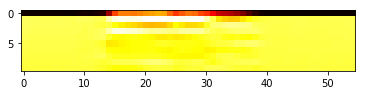

-0.48068237
0.42434692


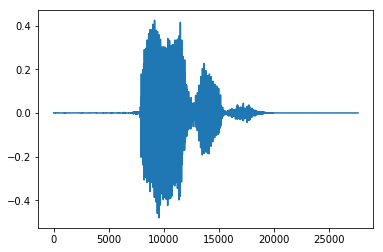

In [30]:
file_path = './audio/atlas-2.wav'
wav, sr,log_spect = load_wav_file(file_path)
ipd.Audio(wav,rate=sr)
log_spect.shape
plt.plot(wav)
print(min(wav))
print(max(wav))

#### TIME SHIFTS

time shift:  1612
spectrogram shape: (241, 167)


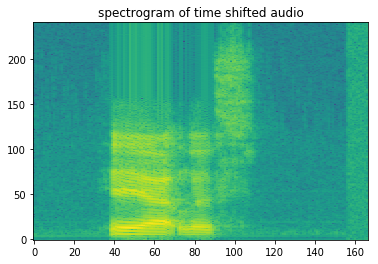

In [55]:
start_ = int(np.random.uniform(-4800,4800))
print('time shift: ',start_)
if start_ >= 0:
    wav_time_shift = np.r_[wav[start_:], np.random.uniform(-0.001,0.001, start_)]
else:
    wav_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), wav[:start_]]
log_spect = np.log(get_spectrogram(wav_time_shift)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of time shifted audio')
plt.show()
ipd.Audio(wav_time_shift, rate=sr)

#### Speed Tuning

speed rate: 1.325 (lower is faster)
wav length:  16000
spectrogram shape: (241, 101)


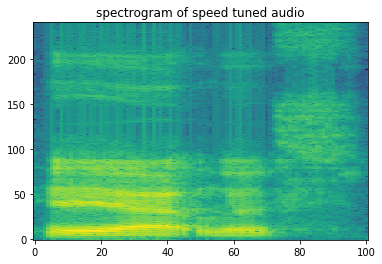

In [56]:
speed_rate = np.random.uniform(1.3,1.4)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 16000:
    pad_len = 16000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 16000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+16000]
print('wav length: ', wav_speed_tune.shape[0])
log_spect = np.log(get_spectrogram(wav_speed_tune)+EPS)
print('spectrogram shape:', log_spect.shape)
plt.imshow(log_spect, aspect='auto', origin='lower',)
plt.title('spectrogram of speed tuned audio')
plt.show()
ipd.Audio(wav_speed_tune, rate=sr)

#### Data Aggregation

In [23]:
def extract_spectograms():
    spect = []
    for file in os.listdir("./audio"):
        if "atlas" in file:
            print("JACK")
        else:
            print("OTHER")
        wav, sr,log_spect = load_wav_file("./audio/" + file, plot=False)
#         plt.plot(wav)
#         plt.show()
        print(log_spect.shape)
        print(sr)
#         spect.add(log_spect)
            

In [24]:
extract_spectograms()

JACK
(241, 173)
16000
OTHER
(241, 257)
16000
OTHER
(241, 205)
16000
JACK
(241, 231)
16000
JACK
(241, 173)
16000
OTHER
(241, 186)
16000
JACK
(241, 180)
16000
JACK
(241, 218)
16000
OTHER
(241, 314)
16000
OTHER
(241, 269)
16000
JACK
(241, 167)
16000
JACK
(241, 180)
16000
OTHER
(241, 173)
16000
OTHER
(241, 167)
16000
JACK
(241, 173)
16000
JACK
(241, 237)
16000
OTHER
(241, 161)
16000
OTHER
(241, 148)
16000
OTHER
(241, 218)
16000
OTHER
(241, 244)
16000
JACK
(241, 225)
16000
JACK
(241, 231)
16000
OTHER
(241, 161)
16000
JACK
(241, 237)
16000
OTHER
(241, 161)
16000
OTHER
(241, 161)
16000
OTHER
(241, 205)
16000
JACK
(241, 301)
16000
OTHER
(241, 205)
16000
OTHER
(241, 321)
16000
JACK
(241, 231)
16000
OTHER
(241, 692)
44100
OTHER
(241, 186)
16000
OTHER
(241, 148)
16000
OTHER
(241, 167)
16000
OTHER
(241, 237)
16000
OTHER
(241, 180)
16000
OTHER
(241, 257)
16000
OTHER
(241, 423)
16000
OTHER
(241, 161)
16000
OTHER
(241, 199)
16000
OTHER
(241, 218)
16000
JACK
(241, 180)
16000
OTHER
(241, 180)
16000
OTH